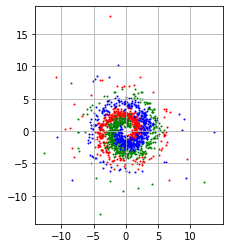

In [10]:
%matplotlib inline


import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import lognorm, norm


n = 500
dr = 10
nrot = 2
k = (nrot * 2 * np.pi) / dr


r = lognorm.rvs(0.5, scale=3, size=(n, 3))
phi = np.random.normal(scale=np.pi / 5, size=(n, 3))
phi_init = 17
phi_shift = np.array([phi_init, phi_init + np.pi / 3 * 2, phi_init + np.pi / 3 * 4])
phi = phi + phi_shift + r * k
x = r * np.cos(phi)
y = r * np.sin(phi)

colors = ['red', 'green', 'blue']
for c, xx, yy in zip(colors, x.T, y.T):
    plt.scatter(xx, yy, color=c, s=1)

plt.grid()
plt.gca().set_aspect('equal')

In [11]:
data = np.zeros([0, 3])

for i in range(3):
    data = np.r_[
        data,
        np.c_[x[:, i:i+1], y[:, i:i+1], np.full([n, 1], i)]
    ]

In [12]:
spiral_df = pd.DataFrame(data=data, columns=['x', 'y', 'class'])
spiral_df['class'] = spiral_df['class'].apply(int)

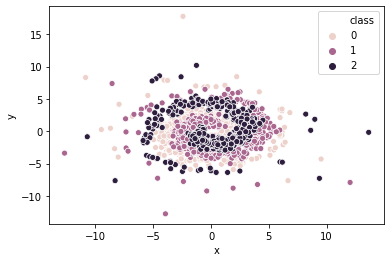

In [13]:
sns.scatterplot(data=spiral_df, x='x', y='y', hue='class')

In [14]:
train_size = 300
spiral_train = spiral_df.iloc[:train_size, :]
spiral_test = spiral_df.iloc[train_size:, :]

In [15]:
os.makedirs('spiral', exist_ok=True)

In [16]:
spiral_train.to_csv('spiral/train.csv')
spiral_test.to_csv('spiral/test.csv')

In [17]:
spiral_df.to_csv('spiral/all.csv', index=False)